# Telco Customer Churn
### Content:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

1) Customers who left within the last month – the column is called Churn
2) Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3) Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4) Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
# import reuired pacakages 
import pandas as pd 
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#loading dataset 
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Data preprocessing

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# total count of records and features in dataset
print("Total records in dataset:",data.shape[0])
print("Total features in dataset:",data.shape[1])

Total records in dataset: 7043
Total features in dataset: 21


In [5]:
# information of dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# checking unique values in dataset 
unique_values={col:data[col].unique() for col in data.columns}
unique_values

{'customerID': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
        '8361-LTMKD', '3186-AJIEK'], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1], dtype=int64),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39], dtype=int64),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No'

In [7]:
value_count={col:data[col].value_counts() for col in data[["MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]]}
value_count

{'MultipleLines': MultipleLines
 No                  3390
 Yes                 2971
 No phone service     682
 Name: count, dtype: int64,
 'OnlineSecurity': OnlineSecurity
 No                     3498
 Yes                    2019
 No internet service    1526
 Name: count, dtype: int64,
 'OnlineBackup': OnlineBackup
 No                     3088
 Yes                    2429
 No internet service    1526
 Name: count, dtype: int64,
 'DeviceProtection': DeviceProtection
 No                     3095
 Yes                    2422
 No internet service    1526
 Name: count, dtype: int64,
 'TechSupport': TechSupport
 No                     3473
 Yes                    2044
 No internet service    1526
 Name: count, dtype: int64,
 'StreamingTV': StreamingTV
 No                     2810
 Yes                    2707
 No internet service    1526
 Name: count, dtype: int64,
 'StreamingMovies': StreamingMovies
 No                     2785
 Yes                    2732
 No internet service    1526
 Name:

#### In the dataset, the entries "No" and "No internet service" are considered the same. This is because services such as online security, online backup, device protection, tech support, and streaming TV,Streaming Movies are only available with an active internet connection. Therefore, if a person has "No internet service", they inherently cannot use these features — functionally making "No" and "No internet service" equivalent for analysis.

In [8]:
# change the datatype of 'TotalCharges' to float 
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"],errors='coerce')

In [9]:
# checking for null data 
print("Total null records:",data.isnull().sum().sum())

Total null records: 11


In [10]:
data.isnull().sum()[data.isnull().sum() > 0]

TotalCharges    11
dtype: int64

In [11]:
# checking for null data 
print("Total null records:",data.isnull().sum().sum())

Total null records: 11


In [12]:
# filling the null using mean 
data["TotalCharges"]=data["TotalCharges"].fillna(data["TotalCharges"].mean())

In [13]:
# replacing "No internet service" with "No"
data.replace("No internet service","No",inplace=True)

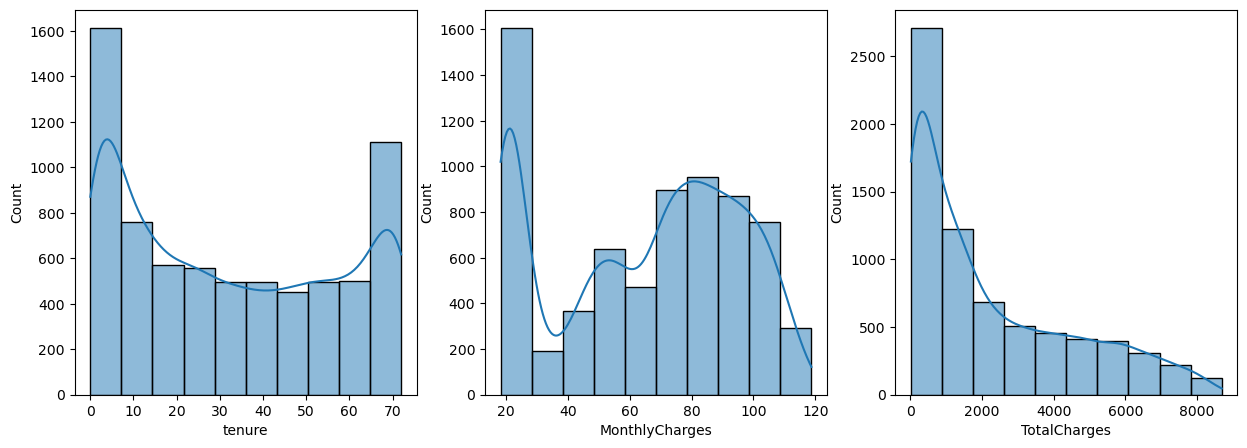

In [14]:
# plotting the numeric data 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data["tenure"],kde=True,bins=10)
plt.subplot(1,3,2)
sns.histplot(data["MonthlyCharges"],kde=True,bins=10)
plt.subplot(1,3,3)
sns.histplot(data["TotalCharges"],kde=True,bins=10)
plt.show()


Text(0.5, 1.0, 'Churn')

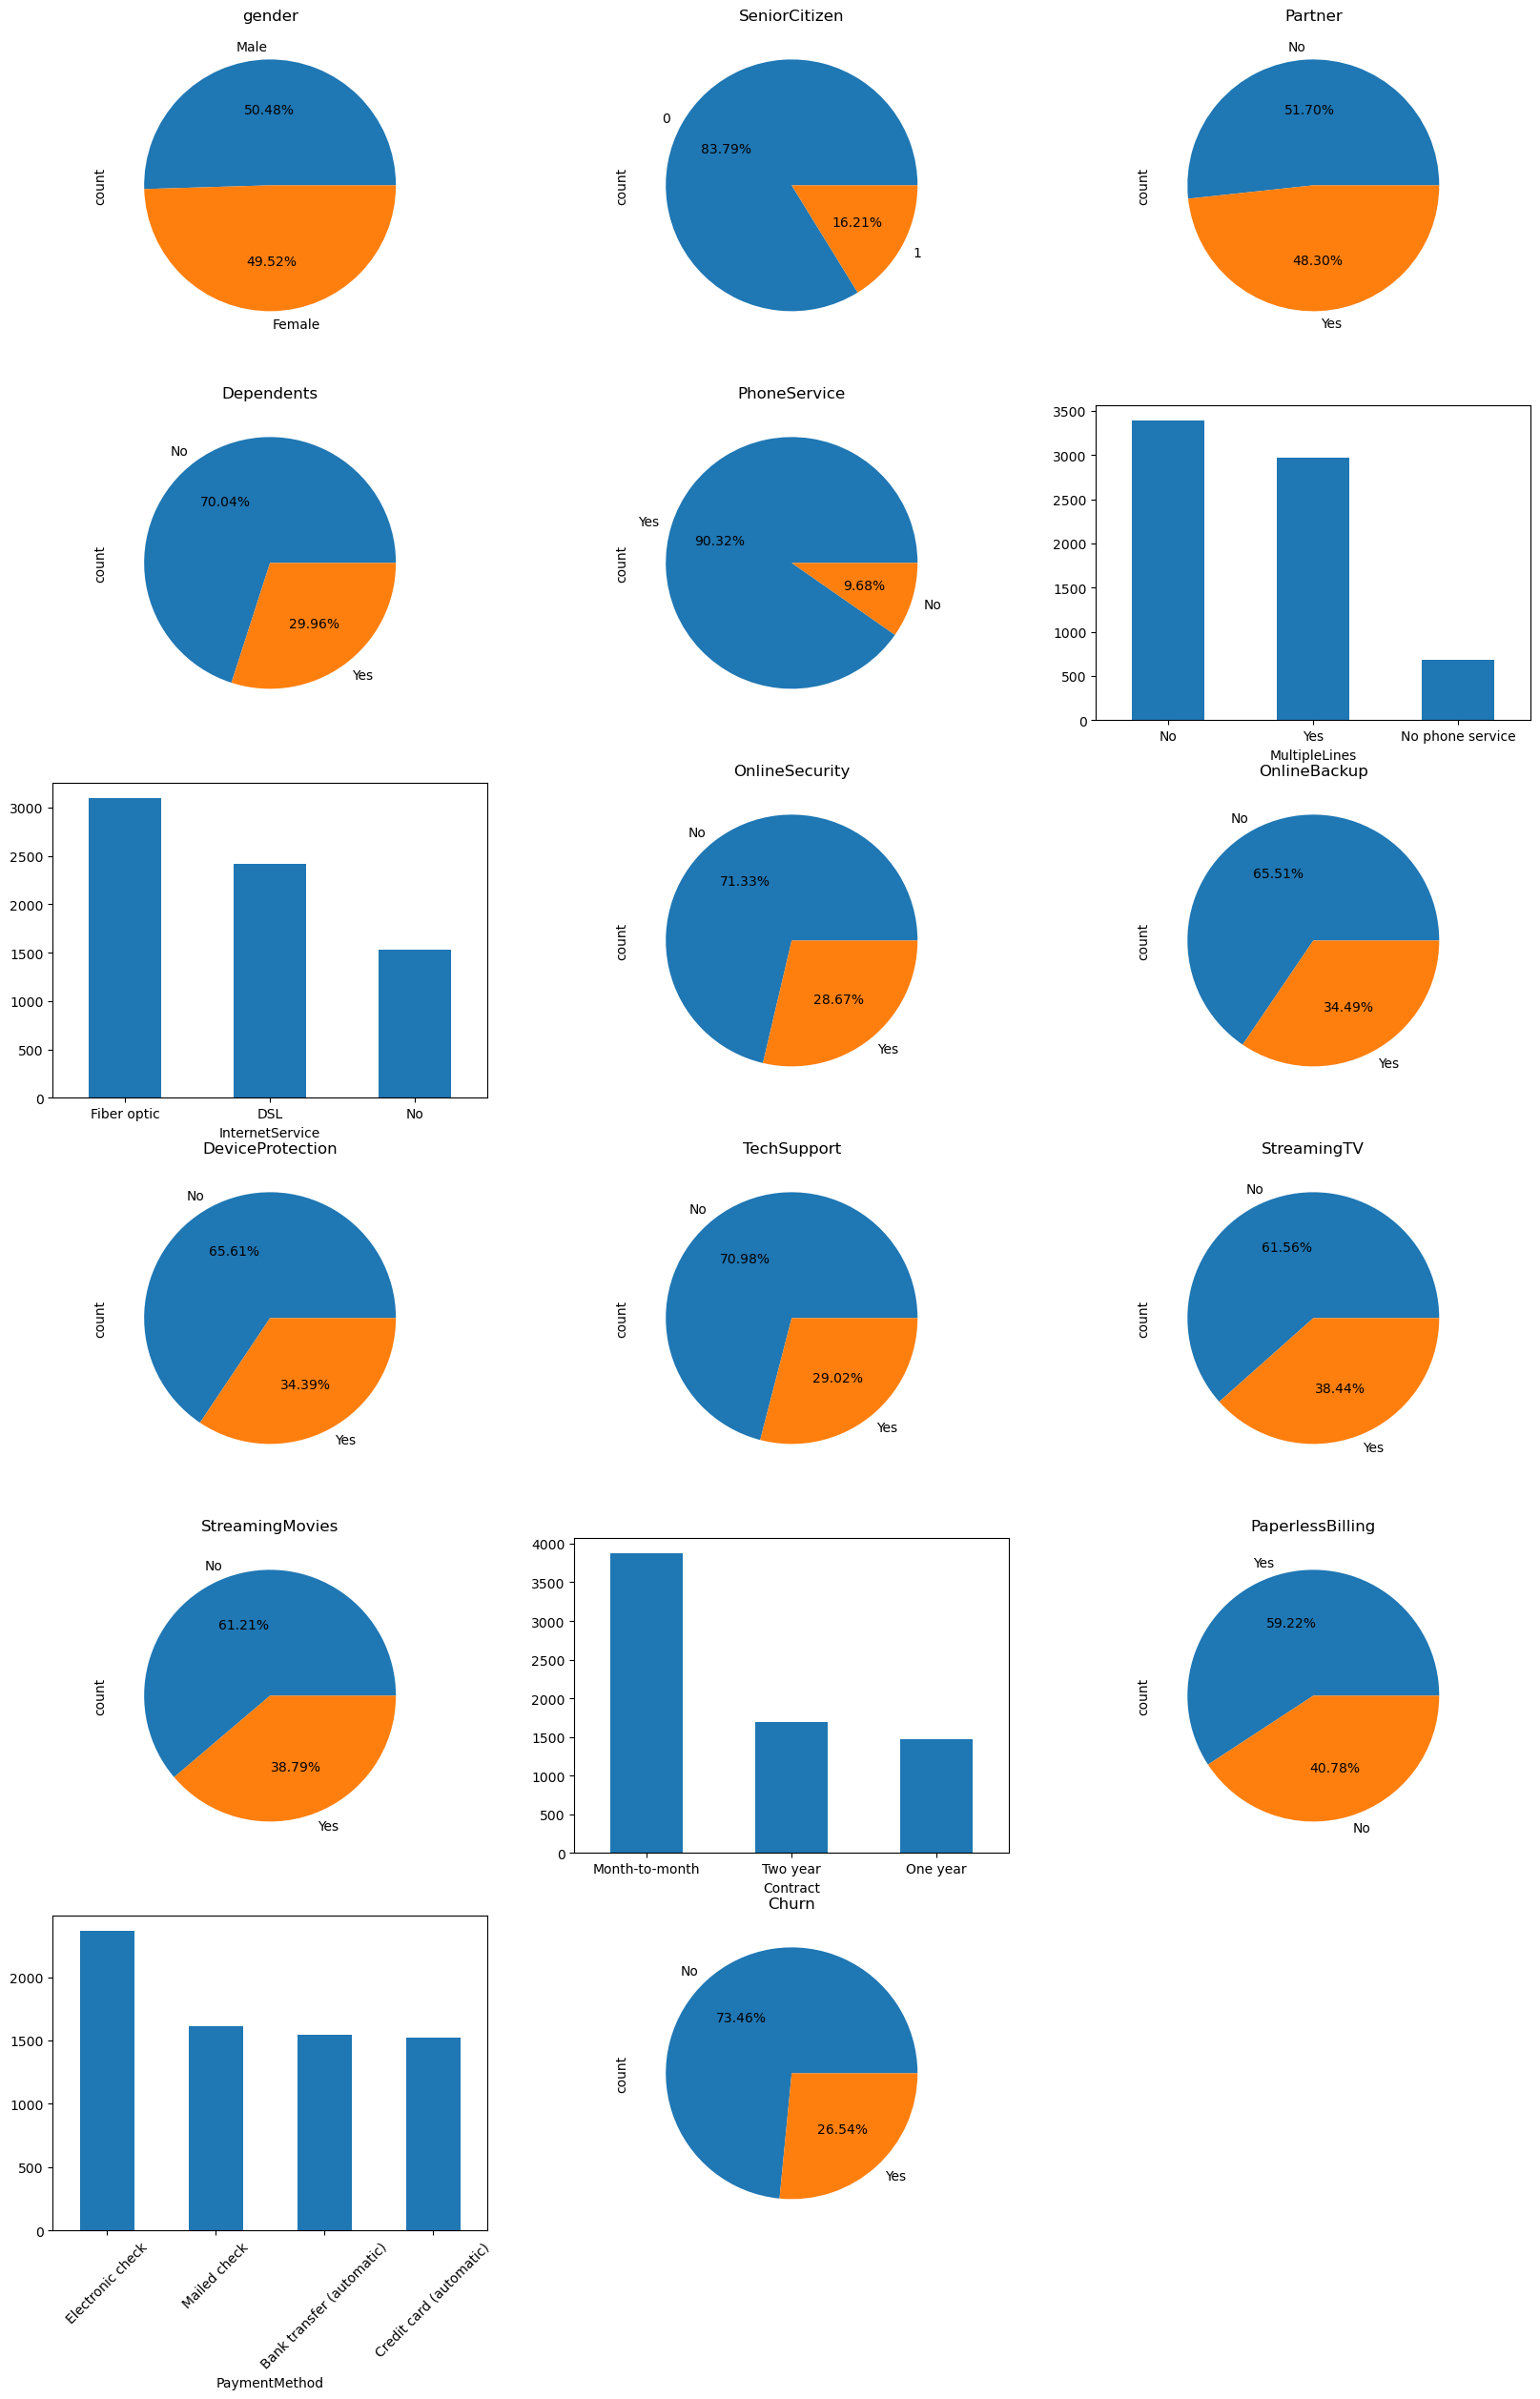

In [15]:
# plotting categorical data 
plt.figure(figsize=(20,30))
plt.subplot(6,3,1)
data["gender"].value_counts().plot(kind="pie",autopct="%2.2f%%")
plt.title("gender")
plt.subplot(6,3,2)
data["SeniorCitizen"].value_counts().plot(kind="pie",autopct="%2.2f%%")
plt.title("SeniorCitizen")
plt.subplot(6,3,3)
data["Partner"].value_counts().plot(kind="pie",autopct="%2.2f%%")
plt.title("Partner")
plt.subplot(6,3,4)
data["Dependents"].value_counts().plot(kind="pie",autopct="%2.2f%%")
plt.title("Dependents")
plt.subplot(6,3,5)
data["PhoneService"].value_counts().plot(kind="pie",autopct="%2.2f%%")
plt.title("PhoneService")
plt.subplot(6,3,6)
data["MultipleLines"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(6,3,7)
data["InternetService"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(6,3,8)
data["OnlineSecurity"].value_counts().plot(kind="pie",autopct="%2.2f%%")
plt.title("OnlineSecurity")
plt.subplot(6,3,9)
data["OnlineBackup"].value_counts().plot(kind="pie",autopct="%2.2f%%")
plt.title("OnlineBackup")
plt.subplot(6,3,10)
data["DeviceProtection"].value_counts().plot(kind="pie",autopct="%2.2f%%")
plt.title("DeviceProtection")
plt.subplot(6,3,11)
data["TechSupport"].value_counts().plot(kind="pie",autopct="%2.2f%%")
plt.title("TechSupport")
plt.subplot(6,3,12)
data["StreamingTV"].value_counts().plot(kind="pie",autopct="%2.2f%%")
plt.title("StreamingTV")
plt.subplot(6,3,13)
data["StreamingMovies"].value_counts().plot(kind="pie",autopct="%2.2f%%")
plt.title("StreamingMovies")
plt.subplot(6,3,14)
data["Contract"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(6,3,15)
data["PaperlessBilling"].value_counts().plot(kind="pie",autopct="%2.2f%%")
plt.title("PaperlessBilling")
plt.subplot(6,3,16)
data["PaymentMethod"].value_counts().plot(kind="bar")
plt.xticks(rotation=45)
plt.subplot(6,3,17)
data["Churn"].value_counts().plot(kind="pie",autopct="%2.2f%%")
plt.title("Churn")

In [16]:
# get a quick overview of data
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
# encoding data into numeric  
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
data[data.select_dtypes(include=["object"]).columns]=data[data.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [18]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [19]:
#skewness 
data.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
PaymentMethod      -0.170129
gender             -0.019031
customerID          0.000000
Partner             0.067922
MultipleLines       0.118719
InternetService     0.205423
tenure              0.239540
StreamingMovies     0.460199
StreamingTV         0.475581
Contract            0.630959
OnlineBackup        0.652817
DeviceProtection    0.657450
Dependents          0.875199
TechSupport         0.924630
OnlineSecurity      0.943722
TotalCharges        0.962394
Churn               1.063031
SeniorCitizen       1.833633
dtype: float64

<Axes: >

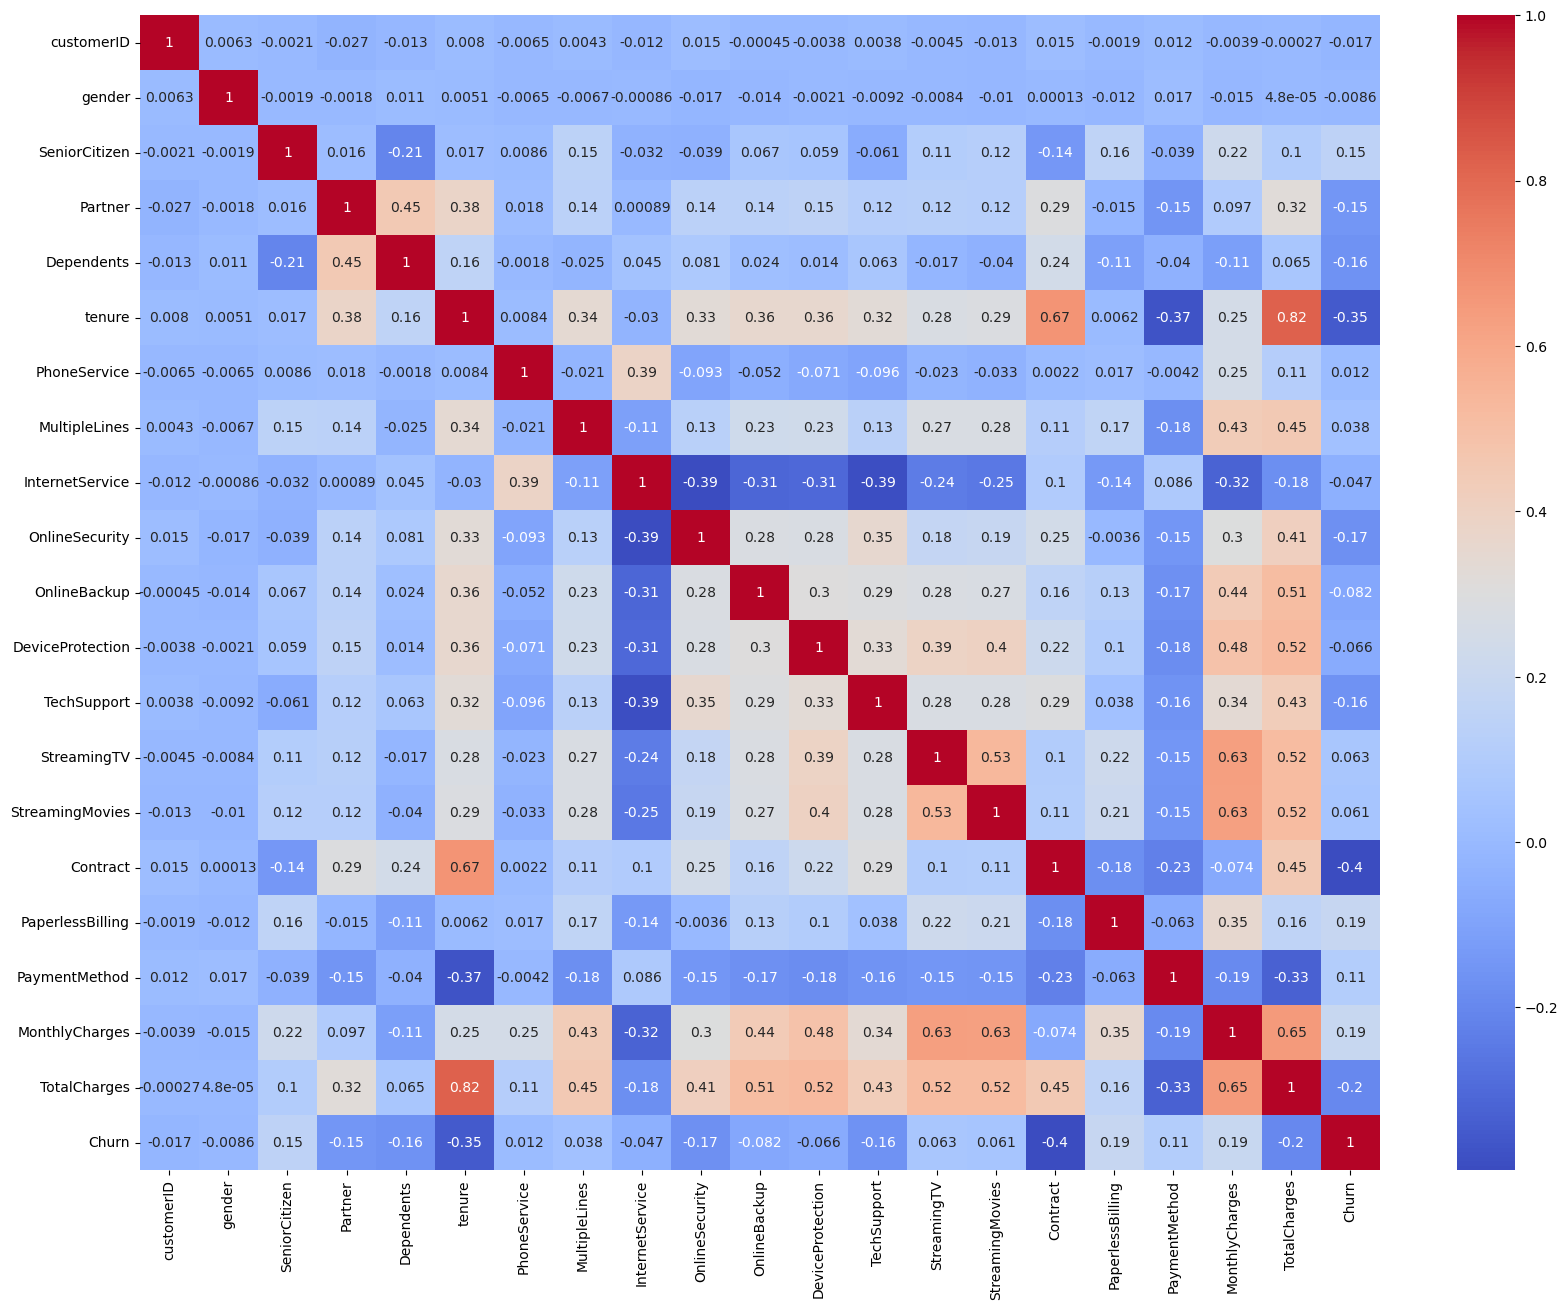

In [20]:
corr=data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,cmap="coolwarm",annot=True)

In [21]:
# dropping some features that are not correlated  with target feature
data.drop(["customerID","gender","PhoneService","MultipleLines","InternetService","TotalCharges"],axis=1,inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int32  
 2   Dependents        7043 non-null   int32  
 3   tenure            7043 non-null   int64  
 4   OnlineSecurity    7043 non-null   int32  
 5   OnlineBackup      7043 non-null   int32  
 6   DeviceProtection  7043 non-null   int32  
 7   TechSupport       7043 non-null   int32  
 8   StreamingTV       7043 non-null   int32  
 9   StreamingMovies   7043 non-null   int32  
 10  Contract          7043 non-null   int32  
 11  PaperlessBilling  7043 non-null   int32  
 12  PaymentMethod     7043 non-null   int32  
 13  MonthlyCharges    7043 non-null   float64
 14  Churn             7043 non-null   int32  
dtypes: float64(1), int32(12), int64(2)
memory usage: 495.3 KB


In [23]:
# divide data into idependent features and target feature 
x=data.iloc[:,:14]
y=data.iloc[:,14:]

In [24]:
x.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1,0,1,0,1,0,0,0,0,0,1,2,29.85
1,0,0,0,34,1,0,1,0,0,0,1,0,3,56.95
2,0,0,0,2,1,1,0,0,0,0,0,1,3,53.85
3,0,0,0,45,1,0,1,1,0,0,1,0,0,42.30
4,0,0,0,2,0,0,0,0,0,0,0,1,2,70.70


In [25]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


## Sampling

In [26]:
# splitting data into train-test split
from sklearn.model_selection import train_test_split 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
# train shape after splitting data
print(train_x.shape)
print(train_y.shape)

(5634, 14)
(5634, 1)


In [28]:
# test shape after splitting data
print(test_x.shape) 
print(test_y.shape)

(1409, 14)
(1409, 1)


## Oversampling

In [29]:
# dataset is imabalanced need to be balanced by oversampling 
from imblearn.over_sampling import SMOTE
sampling=SMOTE()
train_x,train_y=sampling.fit_resample(train_x,train_y)

In [30]:
train_y.value_counts()

Churn
0        4138
1        4138
Name: count, dtype: int64

## Model training and evaluation

In [31]:
# importing models 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 

In [32]:
# impoting metrics to evaluating model 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score 

In [33]:
# creating function of metrics 
def get_metrics(actual,predicted): 
    acc=accuracy_score(actual,predicted)
    cf=confusion_matrix(actual,predicted)
    pr=precision_score(actual,predicted)
    rc=recall_score(actual,predicted)
    f1=f1_score(actual,predicted)
    roc=roc_auc_score(actual,predicted)
    return acc,cf,pr,rc,f1,roc

In [34]:
# dictionary of all models 
models={
    "Logistic Regression":LogisticRegression(), 
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(), 
    "Ada Boost Classifier":AdaBoostClassifier(), 
    "Gradient Boosting Classifier":GradientBoostingClassifier(), 
    "XGB Classifier":XGBClassifier(), 
    "K Neighbors Classifier":KNeighborsClassifier(), 
    "naive_bayes":GaussianNB(), 
    "support vector classifier":SVC()
}

In [35]:
# Looping through all models in the 'models' dictionary
for i in range(len(list(models))):
    # Get the model instance from the dictionary
    model=list(models.values())[i]
     # Fit the model on the training data
    model.fit(train_x,train_y)
    # Make predictions on both training and test data
    train_pred=model.predict(train_x)
    test_pred=model.predict(test_x)
    # Evaluate the model on training data using custom metrics function
    train_acc,train_cf,train_pr,train_rc,train_f1,train_roc=get_metrics(train_y,train_pred)
    # Evaluate the model on testing data using the same metrics function
    test_acc,test_cf,test_pr,test_rc,test_f1,test_roc=get_metrics(test_y,test_pred)
    # Print model name
    print(list(models.keys())[i])
    print("*****************************")
    # Print training data evaluation metrics
    print("Training-data:")
    print("-----------------------------")
    print("accuracy score:",train_acc)
    print("confusion matrix:\n",train_cf)
    print("precision score:",train_pr) 
    print("recall score:",train_rc)             
    print("f1-score:",train_f1) 
    print("roc auc score:",train_roc)
    print("************************************************")
    # Print testing data evaluation metrics
    print("Testing-data:")
    print("-----------------------------")
    print("accuracy score:",test_acc)
    print("confusion matrix:\n",test_cf)
    print("precision score:",test_pr) 
    print("recall score:",test_rc)             
    print("f1-score:",test_f1) 
    print("roc auc score:",test_roc)
    print("====================================================================")
    print("\n")
    

Logistic Regression
*****************************
Training-data:
-----------------------------
accuracy score: 0.790720154664089
confusion matrix:
 [[3102 1036]
 [ 696 3442]]
precision score: 0.768646717284502
recall score: 0.8318028032866119
f1-score: 0.7989786443825441
roc auc score: 0.7907201546640891
************************************************
Testing-data:
-----------------------------
accuracy score: 0.7572746628814763
confusion matrix:
 [[785 251]
 [ 91 282]]
precision score: 0.5290806754221389
recall score: 0.7560321715817694
f1-score: 0.6225165562913907
roc auc score: 0.7568770896518886


Decision Tree Classifier
*****************************
Training-data:
-----------------------------
accuracy score: 0.9983083615273078
confusion matrix:
 [[4133    5]
 [   9 4129]]
precision score: 0.9987905176584422
recall score: 0.9978250362493959
f1-score: 0.9983075435203095
roc auc score: 0.9983083615273078
************************************************
Testing-data:
--------------

## Selecting Models for Hyperparameter Tuning
From the model comparison analysis on the test dataset, we selected Logistic Regression, AdaBoost, and Gradient Boosting for hyperparameter tuning based on the following considerations:

1) Logistic Regression was chosen as a strong baseline model with no signs of overfitting, offering a reliable benchmark. Despite its simplicity, it maintained solid performance across all metrics.

2) AdaBoost showed balanced generalization with consistent accuracy, recall, and F1 scores, and importantly, did not overfit. Its ensemble nature made it a valuable candidate for boosting performance through tuning.

3) Gradient Boosting delivered the highest overall accuracy and F1 score among the non-overfitting models, with only mild signs of overfitting. Its strength in capturing complex patterns made it a promising model for fine-tuning.

These three models provided a mix of interpretability, stability, and advanced learning capabilities, making them ideal choices for hyperparameter optimization.



# Hyperparameter tuning 

In [36]:
# Importing RandomizedSearchCV from sklearn.model_selection for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV 
# Importing StratifiedKFold for cross-validation
from sklearn.model_selection import StratifiedKFold

In [37]:
cv=StratifiedKFold()

In [38]:
# creating function of metrics 
def metrics(actual,predicted): 
    print("accuracy score:",accuracy_score(actual,predicted))
    print("confusion matrix:\n",confusion_matrix(actual,predicted))
    print("precision score:",precision_score(actual,predicted)) 
    print("recall score:",recall_score(actual,predicted))             
    print("f1-score:",f1_score(actual,predicted)) 
    print("roc auc score:",roc_auc_score(actual,predicted))
    

## Hyperparameter tuning Logistic Regression 

In [39]:
# Create an instance of LogisticRegression model
lg=LogisticRegression()

# Define hyperparameters for Logistic Regression to be tuned
c_lg=[0.01,0.1,1,10,100]
penalty_lg=['l1', 'l2', 'elasticnet']
solver_lg=['liblinear']
max_iter_lg=[100,200,300]

# Creating a dictionary to hold the hyperparameter options for RandomizedSearchCV
param_lg=dict(C=c_lg,penalty=penalty_lg,solver=solver_lg,max_iter=max_iter_lg) 

# Instantiate RandomizedSearchCV with Logistic Regression model and the hyperparameter grid
gv_lg=RandomizedSearchCV(estimator=lg,param_distributions=param_lg,n_iter=100,scoring="accuracy",cv=cv,verbose=3,n_jobs=-1)

# Fit the model to the training data with hyperparameter optimization
gv_lg.fit(train_x,train_y)

# Output the best hyperparameters found during the search
print(gv_lg.best_params_)

# Make predictions on the training data and testing data
train_pred_lg=gv_lg.predict(train_x)
test_pred_lg=gv_lg.predict(test_x)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 0.1}


In [40]:
print("Logistic Regression")
print("Training-data:")
metrics(train_y,train_pred_lg)
print("------------------------------------------")
print("Testing-data:")
metrics(test_y,test_pred_lg)

Logistic Regression
Training-data:
accuracy score: 0.7897535041082648
confusion matrix:
 [[3055 1083]
 [ 657 3481]]
precision score: 0.7627081507449606
recall score: 0.8412276462058965
f1-score: 0.8000459664444955
roc auc score: 0.7897535041082648
------------------------------------------
Testing-data:
accuracy score: 0.752306600425834
confusion matrix:
 [[767 269]
 [ 80 293]]
precision score: 0.5213523131672598
recall score: 0.7855227882037533
f1-score: 0.6267379679144385
roc auc score: 0.7629351392756218


## Hyperparameter tuning AdaBoost Classifier 

In [41]:
# Create an instance of AdaBoost model
adc=AdaBoostClassifier()

# Define hyperparameters for AdaBoost to be tuned
n_estimators_adc=[int(x) for x in np.linspace(start=100,stop=400,num=10)]
learning_rate_adc=[0.01,0.3,0.5,0.8,1]
estimator_adc=[1,2]

# Creating a dictionary to hold the hyperparameter options for RandomizedSearchCV
param_adc=dict(n_estimators=n_estimators_adc,learning_rate=learning_rate_adc)

# Instantiate RandomizedSearchCV with AdaBoost model and the hyperparameter grid
gv_adc=RandomizedSearchCV(estimator=adc,param_distributions=param_adc,n_iter=300,scoring="accuracy",cv=cv,verbose=3,n_jobs=-1)

# Fit the model to the training data with hyperparameter optimization
gv_adc.fit(train_x,train_y)

# Output the best hyperparameters found during the search
print(gv_adc.best_params_)

# Make predictions on the training data and testing data
train_pred_adc=gv_adc.predict(train_x)
test_pred_adc=gv_adc.predict(test_x)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'n_estimators': 300, 'learning_rate': 0.5}


In [42]:
print("Ada Boost Classifier")
print("Training-data:")
metrics(train_y,train_pred_adc)
print("------------------------------------------")
print("Testing-data:")
metrics(test_y,test_pred_adc)

Ada Boost Classifier
Training-data:
accuracy score: 0.8147655872402126
confusion matrix:
 [[3177  961]
 [ 572 3566]]
precision score: 0.7877181356306605
recall score: 0.8617689705171581
f1-score: 0.8230813618003462
roc auc score: 0.8147655872402125
------------------------------------------
Testing-data:
accuracy score: 0.7721788502484032
confusion matrix:
 [[796 240]
 [ 81 292]]
precision score: 0.5488721804511278
recall score: 0.7828418230563002
f1-score: 0.6453038674033149
roc auc score: 0.7755907956980344


## Hyperparameter tuning Gradient Boosting Classifier

In [43]:
# Create an instance of Gradient Boosting model
gbc=GradientBoostingClassifier()

# Define hyperparameters for Gradient Boosting to be tuned
learning_rate_gbc=[0.05,0.1]
n_estimators_gbc=[int(x) for x in np.linspace(start=100,stop=150,num=10)]
subsample_gbc=[0.8,1.0]
max_depth_gbc=[2,3,4]
min_samples_split_gbc=[5,10]
min_samples_leaf_gbc=[3,5]
max_features_gbc=['sqrt', 'log2']

# Creating a dictionary to hold the hyperparameter options for RandomizedSearchCV
param_gbc=dict(learning_rate=learning_rate_gbc,n_estimators=n_estimators_gbc,subsample=subsample_gbc,max_depth=max_depth_gbc,min_samples_split=min_samples_split_gbc,min_samples_leaf=min_samples_leaf_gbc,max_features=max_features_gbc)

# Instantiate RandomizedSearchCV with Gradient Boosting model and the hyperparameter grid
gv_gbc=RandomizedSearchCV(estimator=gbc,param_distributions=param_gbc,n_iter=300,scoring="accuracy",cv=cv,verbose=3,n_jobs=-1)

# Fit the model to the training data with hyperparameter optimization
gv_gbc.fit(train_x,train_y)

# Output the best hyperparameters found during the search
print(gv_gbc.best_params_)

# Make predictions on the training data and testing data
train_pred_gbc=gv_gbc.predict(train_x)
test_pred_gbc=gv_gbc.predict(test_x)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
{'subsample': 1.0, 'n_estimators': 144, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 4, 'learning_rate': 0.1}


In [44]:
print("Gradient Boosting Classifier")
print("Training-data:")
metrics(train_y,train_pred_gbc)
print("------------------------------------------")
print("Testing-data:")
metrics(test_y,test_pred_gbc)

Gradient Boosting Classifier
Training-data:
accuracy score: 0.8423151280811987
confusion matrix:
 [[3346  792]
 [ 513 3625]]
precision score: 0.8206927779035544
recall score: 0.876027066215563
f1-score: 0.847457627118644
roc auc score: 0.8423151280811986
------------------------------------------
Testing-data:
accuracy score: 0.7672107877927609
confusion matrix:
 [[811 225]
 [103 270]]
precision score: 0.5454545454545454
recall score: 0.7238605898123325
f1-score: 0.6221198156682027
roc auc score: 0.7533395613154327


## roc_auc_curve for Logistic Regression, AdaBoost, and Gradient Boosting

In [45]:
# Predict class probabilities on test data using the best estimators from RandomizedSearchCV for Logistic Regression, AdaBoost, and Gradient Boosting
test_pred_pr_lg=gv_lg.predict_proba(test_x)
test_pred_pr_adc=gv_adc.predict_proba(test_x)
test_pred_pr_gbc=gv_gbc.predict_proba(test_x)

In [46]:
from sklearn.metrics import roc_curve,auc

In [47]:
# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for ROC curve, and compute AUC
fpr_lg,tpr_lg,threshold_lg= roc_curve(test_y,test_pred_pr_lg[:,1])
auc_lg=auc(fpr_lg,tpr_lg)
fpr_adc,tpr_adc,threshold_adc=roc_curve(test_y,test_pred_pr_adc[:,1])
auc_adc=auc(fpr_adc,tpr_adc)
fpr_gbc,tpr_gbc,threshold_gbc=roc_curve(test_y,test_pred_pr_gbc[:,1])
auc_gbc=auc(fpr_gbc,tpr_gbc)

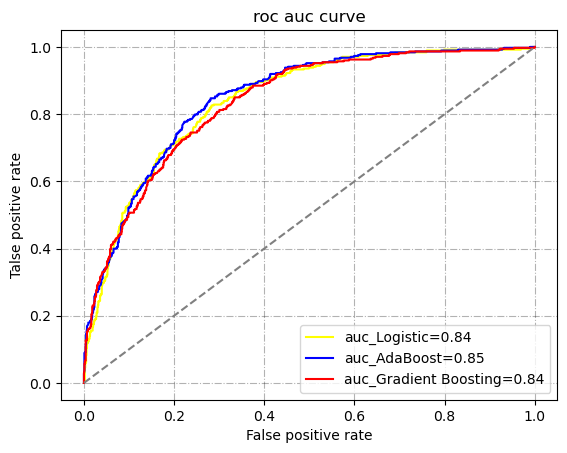

In [48]:
# Plot ROC AUC curves for Logistic Regression, AdaBoost, and Gradient Boosting classifiers
plt.plot(fpr_lg,tpr_lg,label=f"auc_Logistic={auc_lg:.2f}",color="yellow")
plt.plot(fpr_adc,tpr_adc,label=f"auc_AdaBoost={auc_adc:.2f}",color="blue")
plt.plot(fpr_gbc,tpr_gbc,label=f"auc_Gradient Boosting={auc_gbc:.2f}",color="red")
plt.plot([0,1],[0,1],linestyle="dashed",color="gray")
plt.xlabel("False positive rate")
plt.ylabel("Talse positive rate")
plt.title("roc auc curve")
plt.legend(loc="lower right")
plt.grid(color="black",linestyle="dashdot",alpha=0.3)
plt.show()

## Model Selection Summary: Finalizing AdaBoost for Deployment
After performing hyperparameter tuning and evaluating multiple models (Logistic Regression, AdaBoost, and Gradient Boosting), the AdaBoost Classifier has been selected as the final model for deployment based on its superior generalization performance on the test dataset.

1) Key Evaluation Highlights:
    Accuracy (Test Data): AdaBoost achieved an accuracy of 77%, outperforming Logistic Regression and matching Gradient Boosting.

    F1-Score: With a score of 0.64, AdaBoost demonstrated a better balance between precision and recall, which is critical for handling imbalanced         classes such as churn prediction.

   Recall: AdaBoost maintained a high recall of 78%, minimizing false negatives and ensuring that most of the actual churn cases are correctly            identified.

   ROC AUC Score: The model achieved a score of 0.77, indicating strong discriminative power between classes.

2) Robustness & Generalization:
   While Gradient Boosting performed slightly better on the training data, its performance drop on the test data indicates overfitting.
   Logistic Regression, although interpretable, had lower precision and F1-scores, making it less reliable for this task.

## Final Decision:
Based on the evaluation metrics and generalization capability, the AdaBoost Classifier is finalized as the most reliable and balanced model for deployment. It provides a strong combination of accuracy, precision, recall, and AUC, making it well-suited for real-world prediction tasks like churn detection.

# Final model

In [52]:
# final model training  
final_model=AdaBoostClassifier(n_estimators=300,learning_rate=0.5)
final_model.fit(train_x,train_y)

AdaBoostClassifier(learning_rate=0.5, n_estimators=300)

In [53]:
# final model prediction 
final_train_pred=final_model.predict(train_x)
final_test_pred=final_model.predict(test_x)

In [54]:
print("Training-data:")
metrics(train_y,final_train_pred)
print("--------------------------------------")
print("Testing-data:")
metrics(test_y,final_test_pred)

Training-data:
accuracy score: 0.8147655872402126
confusion matrix:
 [[3177  961]
 [ 572 3566]]
precision score: 0.7877181356306605
recall score: 0.8617689705171581
f1-score: 0.8230813618003462
roc auc score: 0.8147655872402125
--------------------------------------
Testing-data:
accuracy score: 0.7721788502484032
confusion matrix:
 [[796 240]
 [ 81 292]]
precision score: 0.5488721804511278
recall score: 0.7828418230563002
f1-score: 0.6453038674033149
roc auc score: 0.7755907956980344
